In [ ]:
from google.colab import drive

drive.mount("/content/drive")

In [ ]:
import sys

sys.path.append("/content/drive/MyDrive/Colab Notebooks/CNN")

In [1]:
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Activation, Flatten, Dense
import matplotlib.pyplot as plt
import cnnutils

2023-09-19 11:44:54.353173: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

In [3]:
COLAB = False

In [4]:
tf.config.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [5]:
root = "/content/drive/MyDrive/Colab Notebooks/CNN/" if COLAB else "./"
root

'./'

# Redes neuronales convolucionales

## Reconocimiento de imágenes
<p> 1989: Yann LeCunn
<p> 1998: Modified NIST (National Institute of Standards and Technology) dataset para reconocimiento de dígitos manuscritos
    

## Imágenes

### Ejemplo: RGB

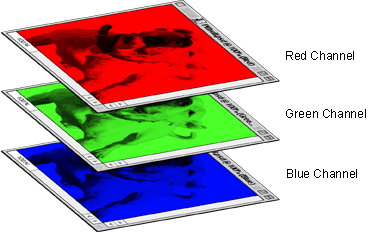

In [6]:
Image.open(root + "channelsrgb.gif")

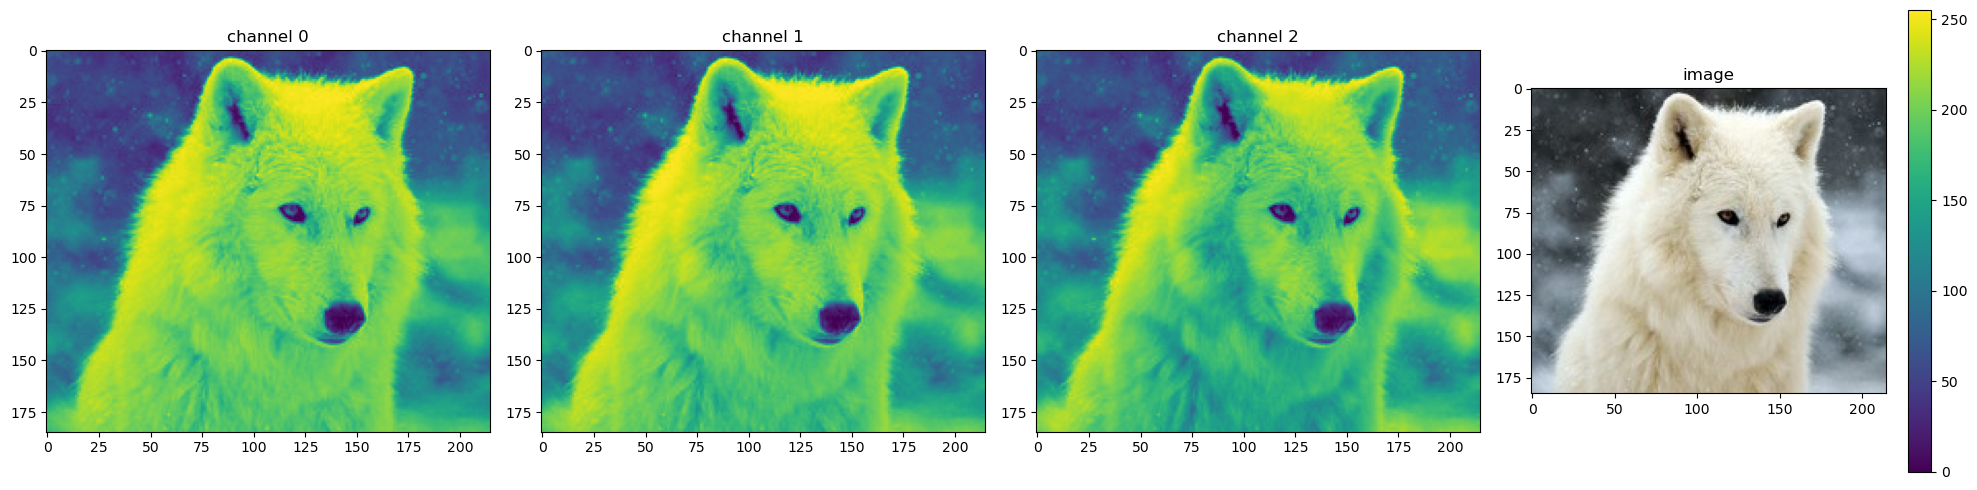

In [7]:
img = cnnutils.load_image(root + "wolf", "jpg")
cnnutils.plot_image(img)

In [8]:
img.shape

TensorShape([185, 215, 3])

In [9]:
img.dtype

tf.uint8

In [10]:
img

<tf.Tensor: shape=(185, 215, 3), dtype=uint8, numpy=
array([[[ 56,  65,  70],
        [ 63,  72,  77],
        [ 67,  76,  81],
        ...,
        [ 57,  62,  66],
        [ 55,  60,  64],
        [ 49,  54,  58]],

       [[ 60,  69,  74],
        [ 71,  80,  85],
        [ 76,  85,  90],
        ...,
        [ 51,  56,  60],
        [ 50,  55,  59],
        [ 46,  51,  55]],

       [[ 70,  79,  84],
        [ 77,  86,  91],
        [ 75,  84,  89],
        ...,
        [ 49,  54,  58],
        [ 50,  55,  59],
        [ 48,  53,  57]],

       ...,

       [[185, 197, 211],
        [181, 193, 207],
        [180, 194, 205],
        ...,
        [178, 191, 199],
        [175, 188, 196],
        [173, 186, 195]],

       [[179, 191, 205],
        [176, 188, 202],
        [176, 190, 201],
        ...,
        [180, 193, 201],
        [179, 192, 200],
        [178, 191, 200]],

       [[177, 189, 203],
        [173, 185, 199],
        [173, 187, 198],
        ...,
        [183, 196, 20

In [11]:
g_img = cnnutils.rgb2grayscale(img)

In [12]:
g_img.shape

TensorShape([185, 215, 1])

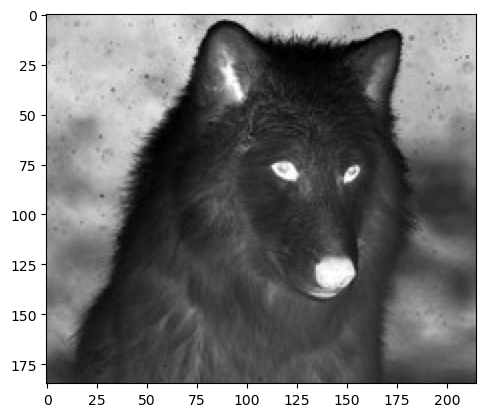

In [13]:
cnnutils.plot_grayscale(g_img)

## Redes neuronales convolucionales

    

### Principio básico
Usar la operación de <b>convolución</b> en lugar de la multiplicación de matrices

### Arquitectura básica


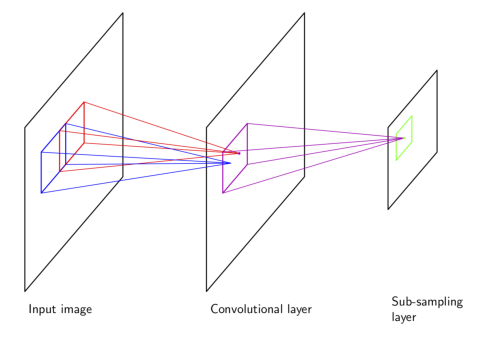

In [14]:
cnn = Image.open(root + "CNN.png")
fig, ax = plt.subplots(figsize=(6, 6))
ax.axis("off")
ax.imshow(cnn)

In [15]:
inp_img = g_img
con_img = Image.open(root + "wolf_output2.jpg")
sub_img = Image.open(root + "wolf_output3.jpg")

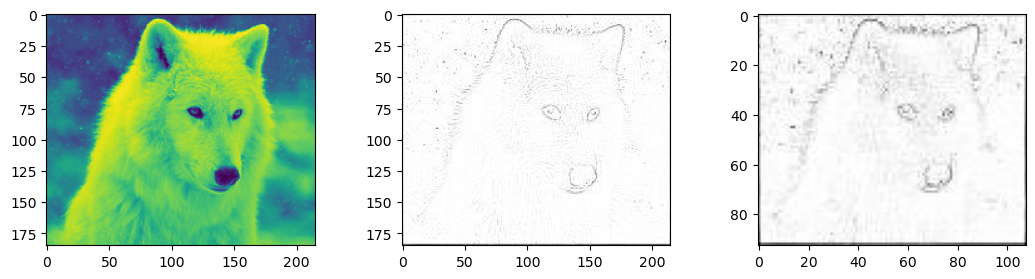

In [16]:
fig, (ax1, ax2, ax3) = plt.subplots(figsize=(13, 3), ncols=3)
ax1.imshow(inp_img)
ax2.imshow(con_img)
ax3.imshow(sub_img)

### Capa convolucional


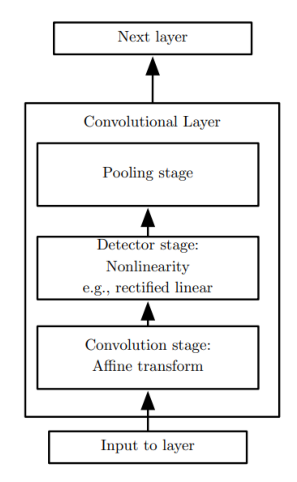

In [17]:
conv_layer = Image.open(root + "conv_layer.png")
fig, ax = plt.subplots(figsize=(6, 6))
ax.axis("off")
ax.imshow(conv_layer)

#### Convolución 2D

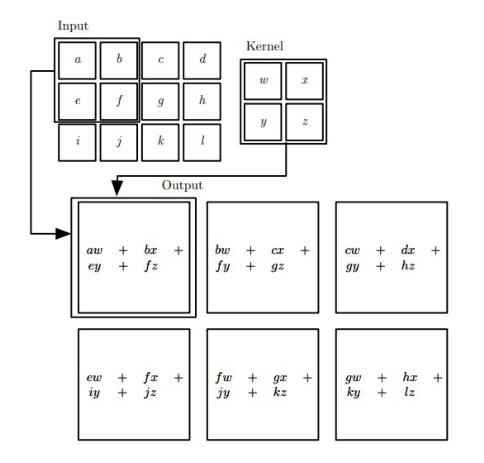

In [18]:
conv_2d = Image.open(root + "conv.jpeg")
fig, ax = plt.subplots(figsize=(6, 6))
ax.axis("off")
ax.imshow(conv_2d)

##### Ejemplo: Un *canal*


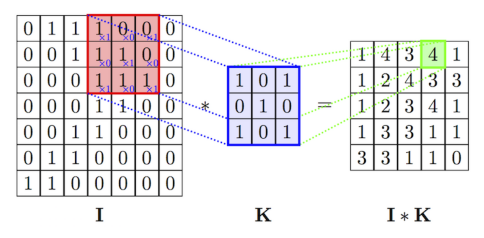

In [19]:
conv_2d = Image.open(root + "conv_kernel.png")
fig, ax = plt.subplots(figsize=(6, 6))
ax.axis("off")
ax.imshow(conv_2d)

#### Padding


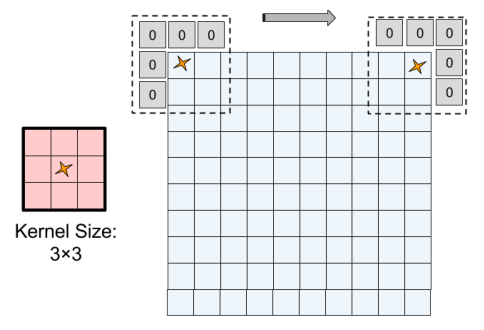

In [20]:
padding = Image.open(root + "padding.png")
fig, ax = plt.subplots(figsize=(6, 6))
ax.axis("off")
ax.imshow(padding)

##### Ejemplo: Padding y múltiples canales

<img src = "https://i.stack.imgur.com/uDgke.gif" height="300" width="600">

#### Filtro Laplaciano


In [21]:
kern = np.array([[-1, -1, -1], [-1, 8, -1], [-1, -1, -1]])
kern

array([[-1, -1, -1],
       [-1,  8, -1],
       [-1, -1, -1]])

In [22]:
kernel_init = cnnutils.KernelInitializer(kern)
kernel_init

#### En Keras

In [23]:
model1 = Sequential(name="Model_1")
model1.add(
    Conv2D(
        1,
        kernel_size=3,
        input_shape=g_img.shape,
        padding="same",
        kernel_initializer=kernel_init,
        name="Conv2D",
    )
)

In [24]:
model1.summary()

Model: "Model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Conv2D (Conv2D)             (None, 185, 215, 1)       10        
                                                                 
Total params: 10 (40.00 Byte)
Trainable params: 10 (40.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


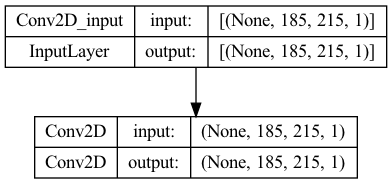

In [25]:
keras.utils.plot_model(model1, to_file="model1.png", show_shapes=True)

In [26]:
output1_imgs = model1.predict(np.array([g_img]))

1/1 [==============================] - 0s 72ms/step


In [27]:
output1_imgs.shape

(1, 185, 215, 1)

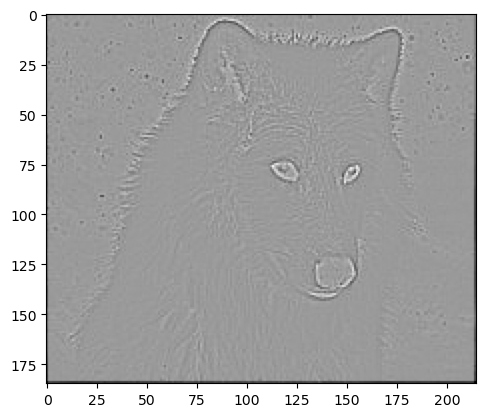

In [28]:
cnnutils.plot_grayscale(output1_imgs[0])

### Detector: Activación relu

In [29]:
model2 = Sequential(name="Model_2")
model2.add(
    Conv2D(
        1,
        kernel_size=3,
        input_shape=g_img.shape,
        padding="same",
        kernel_initializer=kernel_init,
        name="Conv2D",
    )
)
model2.add(Activation(activation="relu", name="Detector"))

In [30]:
model2.summary()

Model: "Model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Conv2D (Conv2D)             (None, 185, 215, 1)       10        
                                                                 
 Detector (Activation)       (None, 185, 215, 1)       0         
                                                                 
Total params: 10 (40.00 Byte)
Trainable params: 10 (40.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


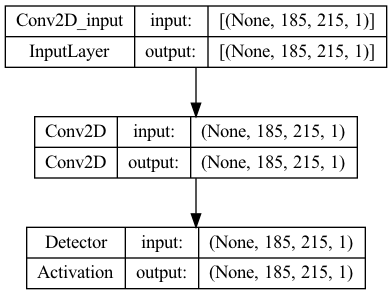

In [31]:
keras.utils.plot_model(model2, to_file="model2.png", show_shapes=True)

In [32]:
output2_imgs = model2.predict(np.array([g_img]))

1/1 [==============================] - 0s 59ms/step


In [33]:
output2_imgs.shape

(1, 185, 215, 1)

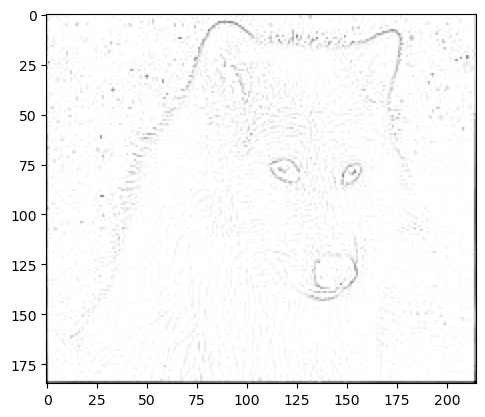

In [34]:
cnnutils.plot_grayscale(output2_imgs[0])

### Subsampling o Pooling

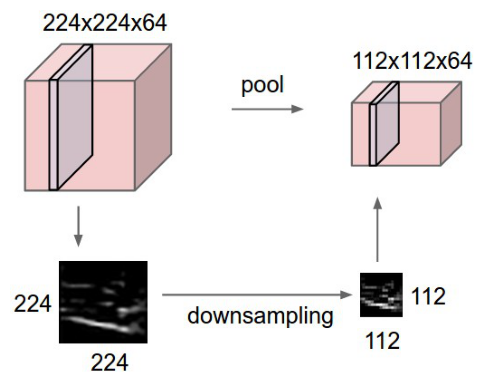

In [35]:
pooling = Image.open(root + "pool.jpeg")
fig, ax = plt.subplots(figsize=(6, 6))
ax.axis("off")
ax.imshow(pooling)

#### Max pooling


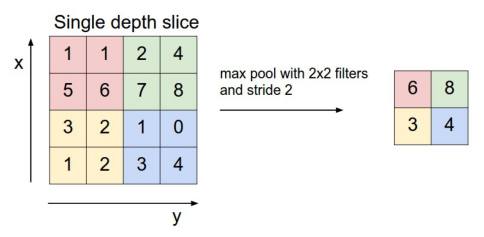

In [36]:
maxpool = Image.open(root + "maxpool.jpeg")
fig, ax = plt.subplots(figsize=(6, 6))
ax.axis("off")
ax.imshow(maxpool)

In [37]:
model3 = Sequential(name="Model_3")
model3.add(
    Conv2D(
        1,
        kernel_size=3,
        input_shape=g_img.shape,
        padding="same",
        kernel_initializer=kernel_init,
        name="Conv2D",
    )
)
model3.add(Activation(activation="relu", name="Detector"))
model3.add(MaxPooling2D(2, padding="same", name="MaxPool"))

In [38]:
model3.summary()

Model: "Model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Conv2D (Conv2D)             (None, 185, 215, 1)       10        
                                                                 
 Detector (Activation)       (None, 185, 215, 1)       0         
                                                                 
 MaxPool (MaxPooling2D)      (None, 93, 108, 1)        0         
                                                                 
Total params: 10 (40.00 Byte)
Trainable params: 10 (40.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


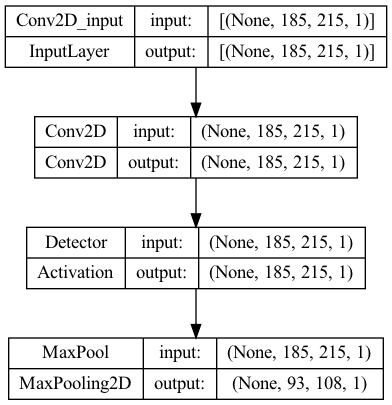

In [39]:
keras.utils.plot_model(model3, to_file="model3.png", show_shapes=True)

In [40]:
output3_imgs = model3.predict(np.array([g_img]))

1/1 [==============================] - 0s 45ms/step


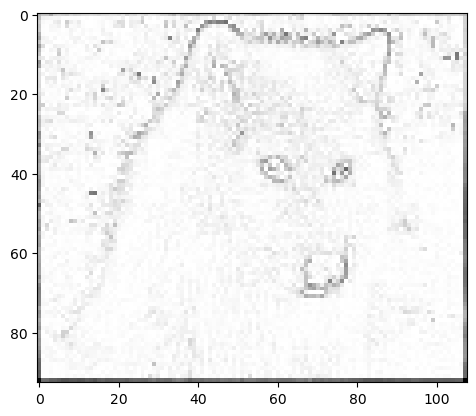

In [41]:
cnnutils.plot_grayscale(output3_imgs[0])

### Arquitectura


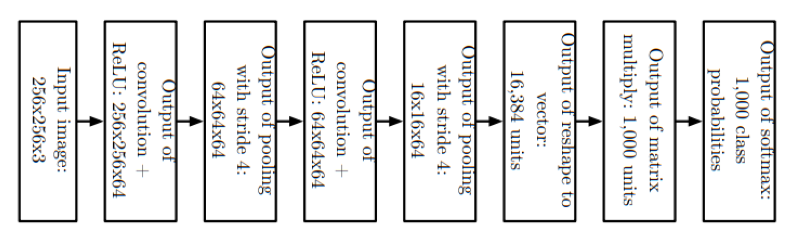

In [42]:
arch = Image.open(root + "architecture.png")
fig, ax = plt.subplots(figsize=(10, 10))
ax.axis("off")
ax.imshow(arch)

In [43]:
model4 = Sequential(name="Model_4")
model4.add(
    Conv2D(
        1,
        kernel_size=3,
        input_shape=g_img.shape,
        padding="same",
        kernel_initializer=kernel_init,
        name="Conv2D",
    )
)
model4.add(Activation(activation="relu", name="Dectector"))
model4.add(MaxPooling2D(2, padding="same", name="MaxPool"))
model4.add(Flatten(name="Flatten"))
model4.add(Dense(64, activation="relu", name="Densa"))
model4.add(Dense(1, activation="sigmoid", name="Decision"))

In [44]:
model4.summary()

Model: "Model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Conv2D (Conv2D)             (None, 185, 215, 1)       10        
                                                                 
 Dectector (Activation)      (None, 185, 215, 1)       0         
                                                                 
 MaxPool (MaxPooling2D)      (None, 93, 108, 1)        0         
                                                                 
 Flatten (Flatten)           (None, 10044)             0         
                                                                 
 Densa (Dense)               (None, 64)                642880    
                                                                 
 Decision (Dense)            (None, 1)                 65        
                                                                 
Total params: 642955 (2.45 MB)
Trainable params: 642955 (2.

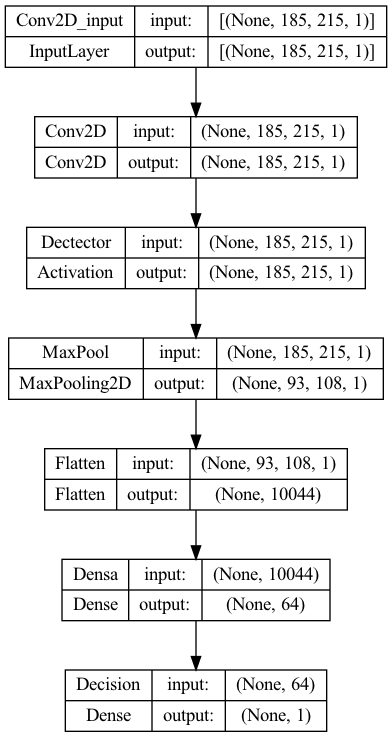

In [45]:
keras.utils.plot_model(model4, to_file="model4.png", show_shapes=True)

In [46]:
model4.predict(np.array([g_img]))

1/1 [==============================] - 0s 60ms/step


array([[0.]], dtype=float32)